In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Add src to Python path to import modules
sys.path.insert(0, '../src') 

import data_processing
import eda_analysis


In [7]:
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
DATA_FILE_PATH = '../data/raw_analyst_ratings.csv'

In [8]:
# --- Load Data ---
raw_df = data_processing.load_financial_news_data(DATA_FILE_PATH)
print("--- Raw Data Sample ---")
print(raw_df.head())
raw_df.info()


--- Raw Data Sample ---
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A  
2 2020-0

In [9]:
# --- Preprocess Data ---
df = data_processing.preprocess_text_data(raw_df, text_col='headline')
df = data_processing.extract_date_features(df, date_col='date')
print("\n--- Processed Data Sample with new features ---")
print(df[['headline', 'headline_length', 'processed_headline', 'publication_date_only', 'publication_hour']].head())


--- Processed Data Sample with new features ---
                                            headline  headline_length  \
0            Stocks That Hit 52-Week Highs On Friday               39   
1         Stocks That Hit 52-Week Highs On Wednesday               42   
2                      71 Biggest Movers From Friday               29   
3       46 Stocks Moving In Friday's Mid-Day Session               44   
4  B of A Securities Maintains Neutral on Agilent...               87   

                                  processed_headline publication_date_only  \
0                       stocks hit week highs friday            2020-06-05   
1                    stocks hit week highs wednesday            2020-06-03   
2                              biggest movers friday            2020-05-26   
3               stocks moving friday mid day session            2020-05-22   
4  securities maintains neutral agilent technolog...            2020-05-22   

   publication_hour  
0                10  


--- Descriptive Statistics for headline_length ---
count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


/home/fentahun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


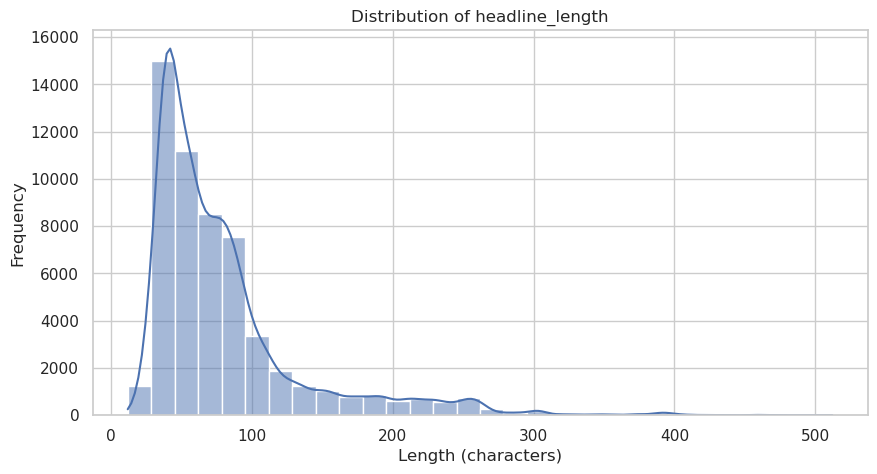

In [10]:
# --- Perform EDA ---
# Descriptive Statistics
eda_analysis.get_descriptive_stats_text(df, text_col_length='headline_length')


--- Publisher Analysis (Top 15) ---
publisher
Benzinga Newsdesk          14750
Lisa Levin                 12408
ETF Professor               4362
Paul Quintaro               4212
Benzinga Newsdesk           3177
Benzinga Insights           2332
Vick Meyer                  2128
Charles Gross               1790
Hal Lindon                  1470
Benzinga_Newsdesk           1239
Eddie Staley                1003
vishwanath@benzinga.com      924
Shanthi Rexaline             887
Monica Gerson                611
Wayne Duggan                 465
Name: count, dtype: int64


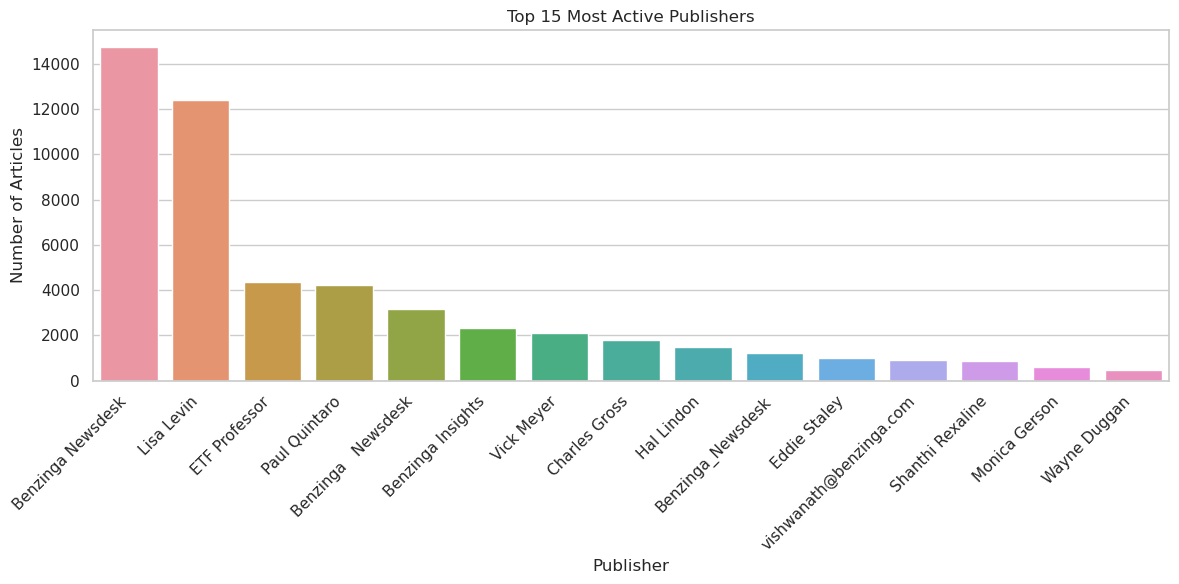

In [11]:
eda_analysis.analyze_publishers(df, publisher_col='publisher', top_n=15)

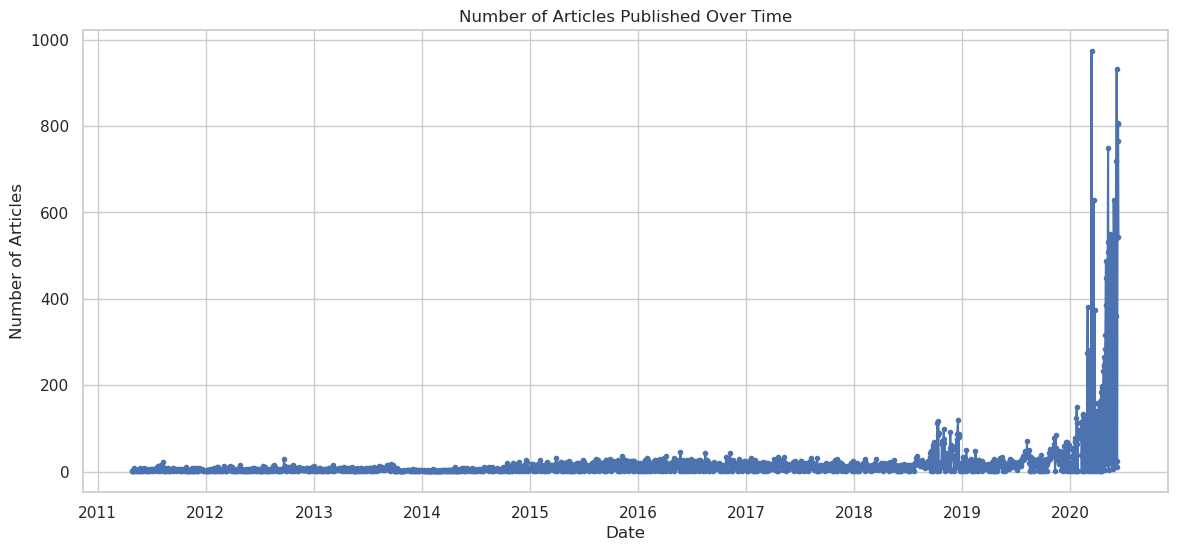

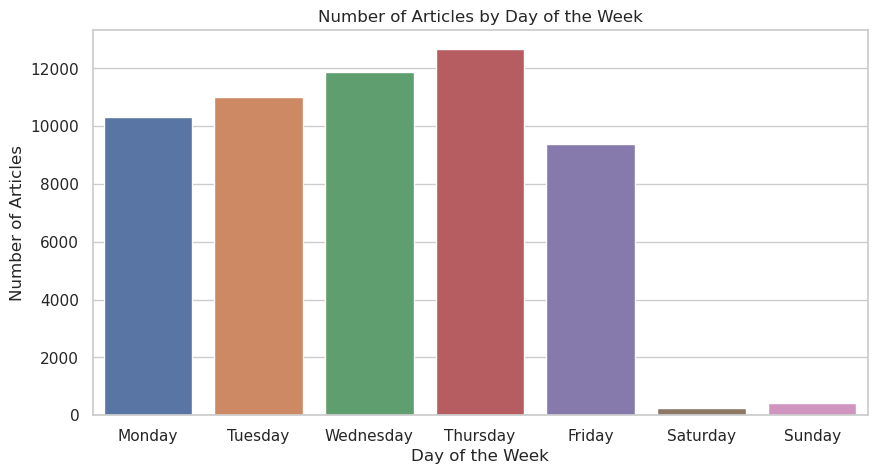

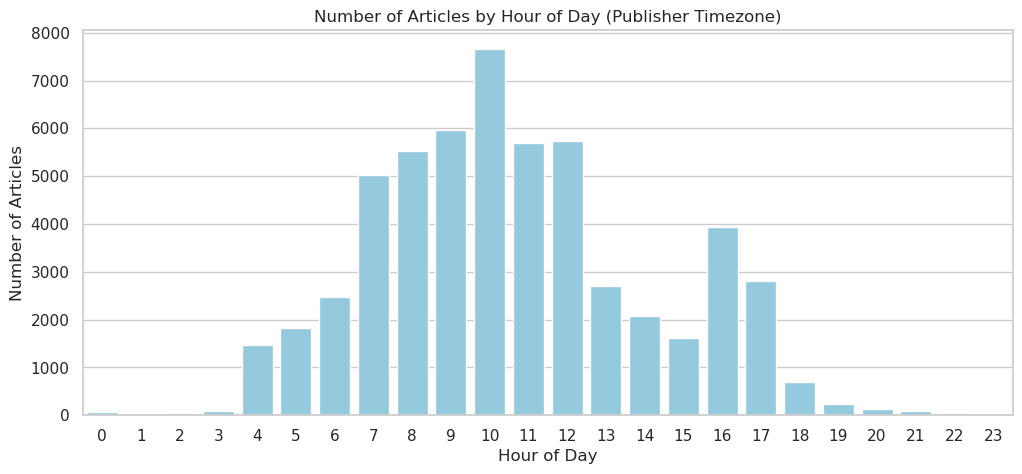

In [12]:
# Publication Trends
eda_analysis.analyze_publication_trends(df, 
                                        date_only_col='publication_date_only',
                                        day_of_week_col='publication_day_of_week',
                                        hour_col='publication_hour')

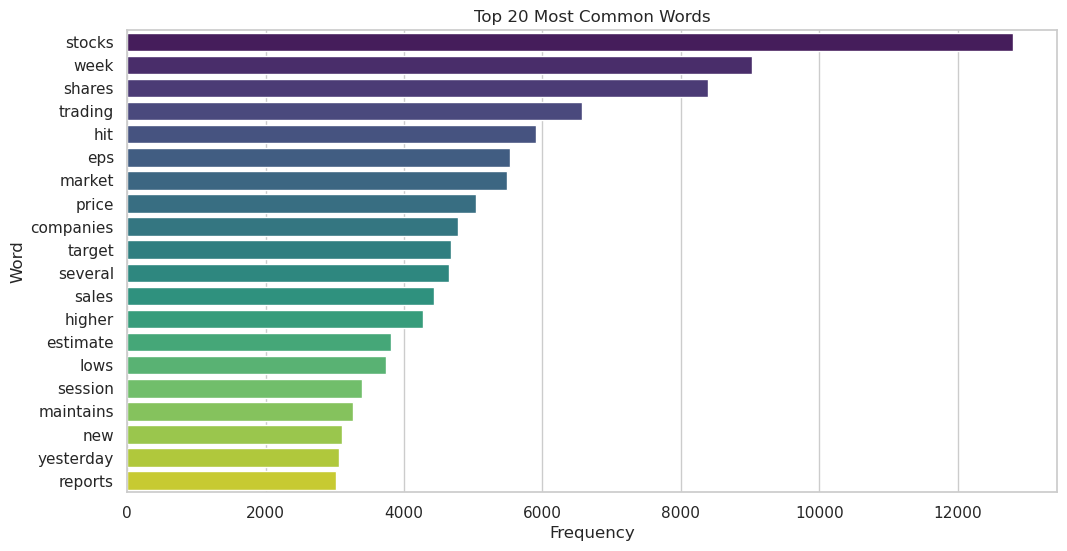

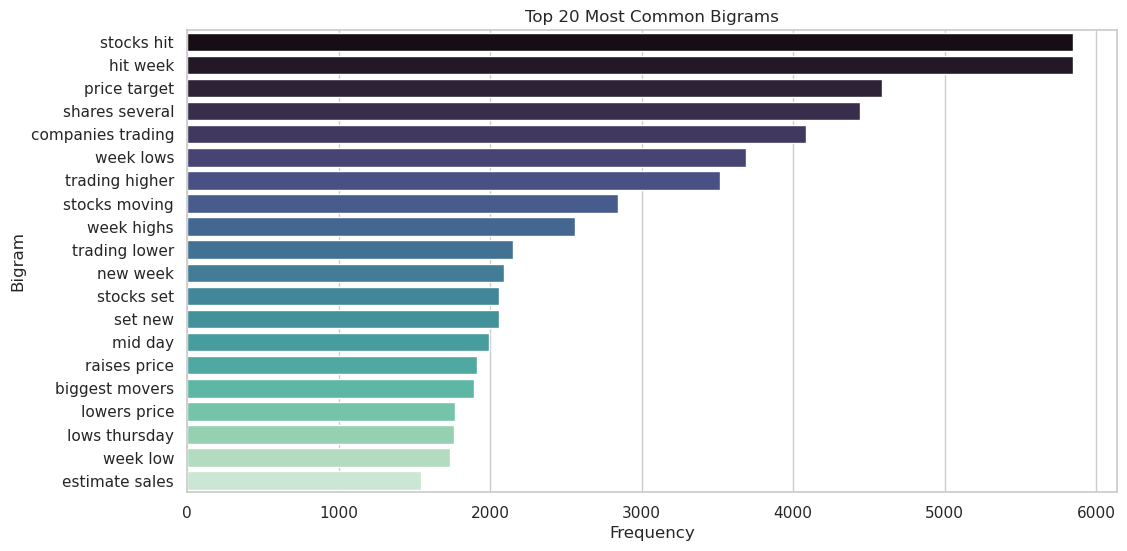

In [13]:
# Text Analysis (Keywords)
eda_analysis.extract_common_keywords(df, processed_text_col='processed_headline', top_n=20)


--- Stock Symbol Mentions (Top 15) ---
stock
A        10
NI       10
NRIM     10
NRG      10
NRF      10
NRCIB    10
NRCIA    10
NR       10
NPV      10
NPTN     10
NPSP     10
NPO      10
NPK      10
NPD      10
NPBC     10
Name: count, dtype: int64


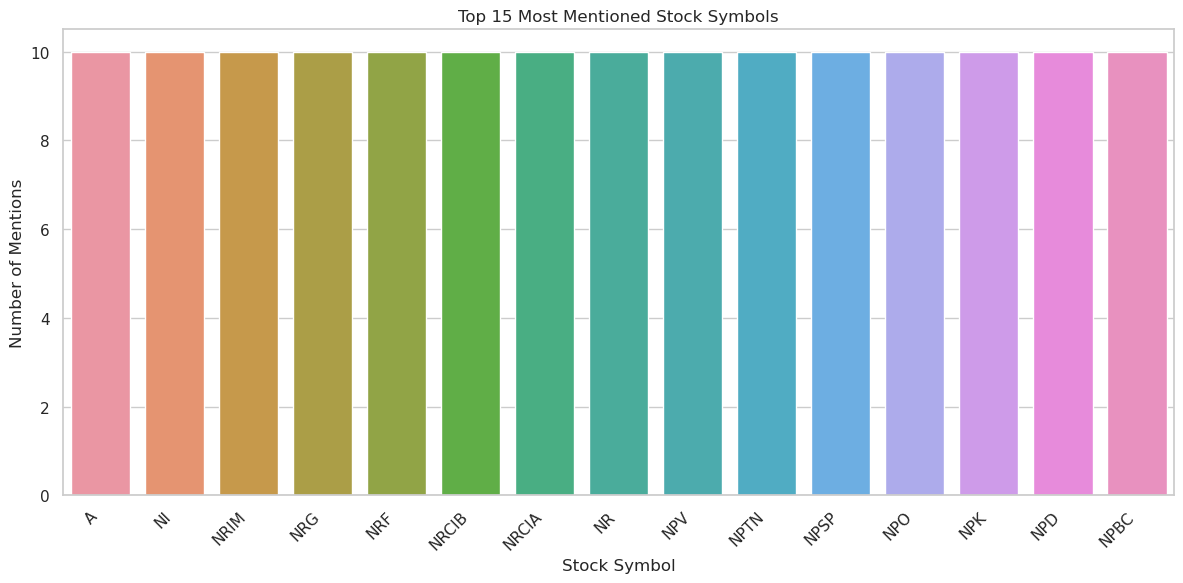


EDA complete.


In [14]:
# Stock Symbol Analysis (simple value counts for now)
if 'stock' in df.columns:
    print("\n--- Stock Symbol Mentions (Top 15) ---")
    stock_counts = df['stock'].value_counts().nlargest(15)
    print(stock_counts)
    plt.figure(figsize=(12,6))
    sns.barplot(x=stock_counts.index, y=stock_counts.values)
    plt.title("Top 15 Most Mentioned Stock Symbols")
    plt.xlabel("Stock Symbol")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'stock' not found for symbol analysis.")
    
print("\nEDA complete.")